In [58]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
%matplotlib inline

['NanumGothic']


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\dataList\drinks.csv'
drinks = pd.read_csv(file_path)

In [39]:
drinks.info() #파일정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [104]:
drinks.head(10) #앞에서 5개 확인

,country,맥주,독주,와인,총알콜,대륙명
0,Afghanistan,0,0,0,0.0,아시아
1,Albania,89,132,54,4.9,유럽
2,Algeria,25,0,14,0.7,아프리카
3,Andorra,245,138,312,12.4,유럽
4,Angola,217,57,45,5.9,아프리카
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,남아메리카
7,Armenia,21,179,11,3.8,유럽
8,Australia,261,72,212,10.4,오세아니아
9,Austria,279,75,191,9.7,유럽


In [41]:
drinks['continent'].unique() #대륙에 고유값 확인 , nan이 북아메리카인걸 구글링 통해 확인

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [42]:
drinks.rename(columns={'나라':'country','beer_servings': '맥주', 'spirit_servings':'독주','wine_servings':'와인','total_litres_of_pure_alcohol':'총알콜',  'continent' : '대륙명'}, inplace=True) #영어를 한글로 변경

In [43]:
drinks.head()

,country,맥주,독주,와인,총알콜,대륙명
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [44]:
continent_mapping = {'AS': '아시아', 'EU': '유럽', 'AF': '아프리카', 'nan': '북아메리카', 'SA': '남아메리카', 'OC':'오세아니아'}
drinks['대륙명'] = drinks['대륙명'].map(continent_mapping) #대륙명 한번에 알아볼 수 있게 한글로 변경함 

In [106]:
drinks.head(10)
# drinks.describe()

,country,맥주,독주,와인,총알콜,대륙명
0,Afghanistan,0,0,0,0.0,아시아
1,Albania,89,132,54,4.9,유럽
2,Algeria,25,0,14,0.7,아프리카
3,Andorra,245,138,312,12.4,유럽
4,Angola,217,57,45,5.9,아프리카
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,남아메리카
7,Armenia,21,179,11,3.8,유럽
8,Australia,261,72,212,10.4,오세아니아
9,Austria,279,75,191,9.7,유럽


In [47]:
corr = drinks[['맥주','와인']].corr(method = 'pearson') #두 칼럼 사이의 피어슨 상관계수 구하기
print(corr)

          맥주        와인
맥주  1.000000  0.527172
와인  0.527172  1.000000


In [52]:
cols = ['맥주','독주','와인','총알콜']  # 네 개의 칼럼 사이의 피어슨 상관계수 구하기
corr = drinks[cols].corr(method='pearson')
print(corr)
plt.rc('font', family='NanumGothic')

           맥주        독주        와인       총알콜
맥주   1.000000  0.458819  0.527172  0.835839
독주   0.458819  1.000000  0.194797  0.654968
와인   0.527172  0.194797  1.000000  0.667598
총알콜  0.835839  0.654968  0.667598  1.000000


In [91]:
#한글폰트깨짐

import matplotlib.pyplot as plt

# 현재 설정된 폰트 정보 가져오기
font_properties = plt.rcParams['font.family']
print(f"현재 설정된 폰트: {font_properties}")


현재 설정된 폰트: ['NanumGothic']


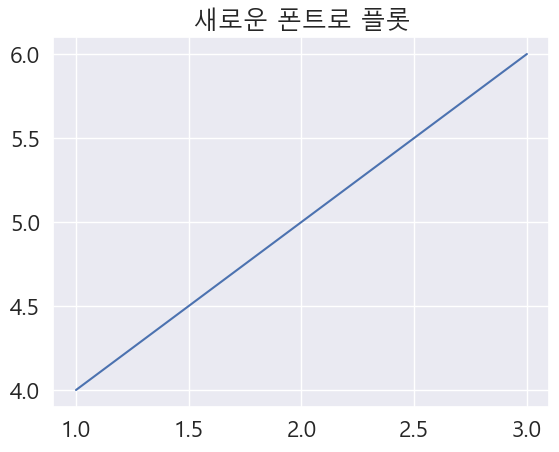

In [92]:
#한글폰트깨짐

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


# 변경된 폰트로 새로운 플롯 그리기
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("새로운 폰트로 플롯")

# 변경된 폰트로 저장
plt.savefig("new_font_plot.png")

# 변경된 폰트로 플롯을 화면에 보여주기
plt.show()


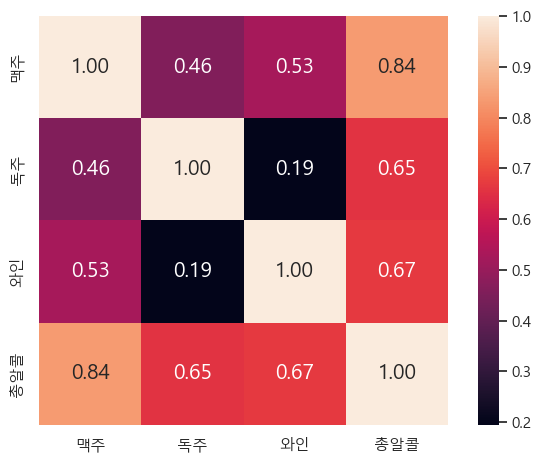

In [101]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'Malgun Gothic'



# 그래프 그리기
cols_view = ['맥주','독주','와인','총알콜']
sns.set(font="Malgun Gothic")
        # rc={"axes.unicode_minus":False},
        # style='darkgrid')
hm = sns.heatmap(corr.values, #상관계수 행렬의 값 사용
                 cbar=True,   #컬러바를 표시
                 annot=True,  #각 셀에 숫자를 표시 
                 square=True, #각 셀을 정사각형 모양으로 표시
                 fmt='.2f',   #숫자를 소수점 둘쨰자리까지 표시
                 annot_kws={'size': 15}, #숫자 표시의 크기를 조정
                 yticklabels=cols_view, # x축 눈금
                 xticklabels=cols_view) # y축 눈금

plt.tight_layout()
plt.show()



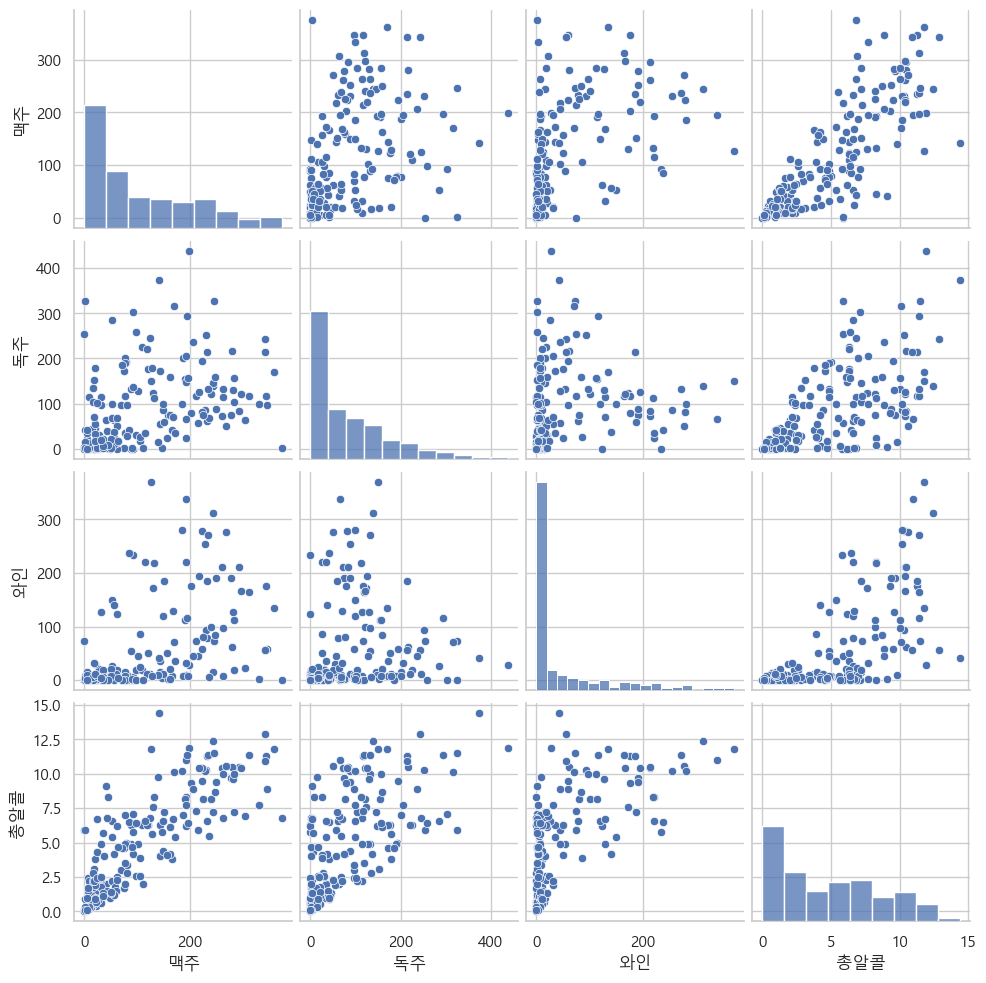

In [102]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.  #산점도 행렬
sns.set(font="Malgun Gothic",style='whitegrid', context='notebook')
sns.pairplot(drinks[['맥주', '독주', 
                     '와인', '총알콜']], height=2.5)
plt.show()

In [107]:
print(drinks.isnull().sum()) #각 열에 누락된 값 출력
print("------------------------------------")
print(drinks.dtypes) #각 열에 대한 데이터 타입 확인

country     0
맥주          0
독주          0
와인          0
총알콜         0
대륙명        23
dtype: int64
------------------------------------
country     object
맥주           int64
독주           int64
와인           int64
총알콜        float64
대륙명         object
dtype: object


In [109]:
# 결측데이터를 처리 : 대륙명에서 NAN을 기타로 바꿈
drinks['대륙명'] = drinks['대륙명'].fillna('기타')
drinks.head(10)

,country,맥주,독주,와인,총알콜,대륙명
0,Afghanistan,0,0,0,0.0,아시아
1,Albania,89,132,54,4.9,유럽
2,Algeria,25,0,14,0.7,아프리카
3,Andorra,245,138,312,12.4,유럽
4,Angola,217,57,45,5.9,아프리카
5,Antigua & Barbuda,102,128,45,4.9,기타
6,Argentina,193,25,221,8.3,남아메리카
7,Armenia,21,179,11,3.8,유럽
8,Australia,261,72,212,10.4,오세아니아
9,Austria,279,75,191,9.7,유럽


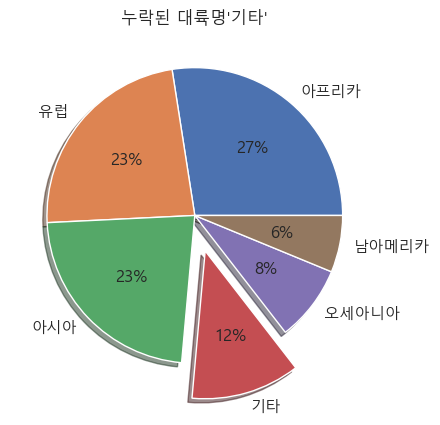

In [111]:
labels = drinks['대륙명'].value_counts().index.tolist() #대륙명 열의 각 카테고리 별로 데이터를 카운트하고 인덱스를 리스트로 반환 ,대륙명의 종류
fracs1 = drinks['대륙명'].value_counts().values.tolist() #대륙명 열의 각 카테고리별로 데이터를 카운트하고 그 결과의 값들을 리스트로 반환 ,대륙명별 데이터 몇개 인지
# continent_counts = drinks['대륙명'].value_counts()
# print(continent_counts) -> 기타를 강조하기 위해 기타가 몇번째 인지 확인
explode = (0, 0, 0, 0.25, 0, 0) #특정부분 강조, 기타에 해당하는 값 강조

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('누락된 대륙명\'기타\'')
plt.show()

In [117]:
# 대륙별 독주의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('대륙명').독주.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
대륙명,,,,
기타,165.739130,68,438,3812
남아메리카,114.750000,25,302,1377
아시아,60.840909,0,326,2677
아프리카,16.339623,0,152,866
오세아니아,58.437500,0,254,935


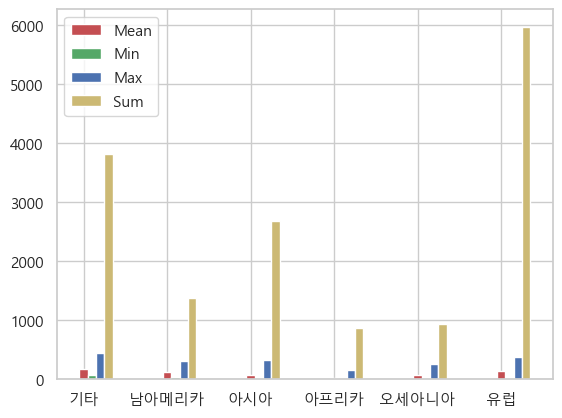

In [123]:
# 대륙별 독주의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [118]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.총알콜.mean()
continent_mean = drinks.groupby('대륙명')['총알콜'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

대륙명
기타       5.995652
남아메리카    6.308333
유럽       8.617778
Name: 총알콜, dtype: float64


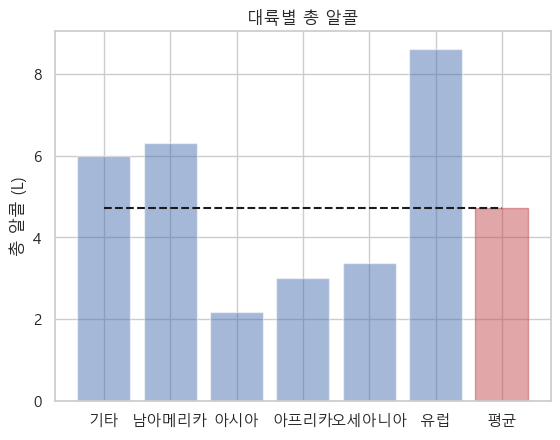

In [127]:
# 대륙별 총알콜을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('평균')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('총 알콜 (L)')
plt.title('대륙별 총 알콜')

plt.show()

In [121]:
# 평균 맥주가 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby('대륙명').맥주.mean().idxmax()
print(beer_continent)

유럽


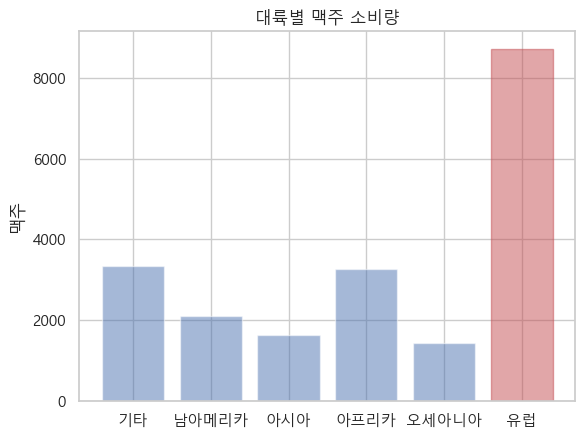

In [125]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('대륙명')['맥주'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("유럽")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('맥주')
plt.title('대륙별 맥주 소비량')
 
plt.show()